In [1]:
import os
import math
import matplotlib.pyplot as plt
from collections import deque

In [2]:
def visualize_maze(matrix, bonus, start, end, route=None):
    """
    Args:
      1. matrix: The matrix read from the input file,
      2. bonus: The array of bonus points,
      3. start, end: The starting and ending points,
      4. route: The route from the starting point to the ending one, defined by an array of (x, y), e.g. route = [(1, 2), (1, 3), (1, 4)]
    """
    #1. Define walls and array of direction based on the route
    walls=[(i,j) for i in range(len(matrix)) for j in range(len(matrix[0])) if matrix[i][j]=='x']
    
    if route:
        direction=[]
        for i in range(1,len(route)):
            if route[i][0]-route[i-1][0]>0:
                direction.append('v') #^
            elif route[i][0]-route[i-1][0]<0:
                direction.append('^') #v        
            elif route[i][1]-route[i-1][1]>0:
                direction.append('>')
            else:
                direction.append('<')

        direction.pop(0)

    #2. Drawing the map
    ax=plt.figure(dpi=120).add_subplot(111)

    for i in ['top','bottom','right','left']:
        ax.spines[i].set_visible(False)

    plt.scatter([i[1] for i in walls],[-i[0] for i in walls],
                marker='X',s=100,color='black')
    
    plt.scatter([i[1] for i in bonus],[-i[0] for i in bonus],
                marker='P',s=100,color='green')

    plt.scatter(start[1],-start[0],marker='*',
                s=100,color='gold')

    if route:
        for i in range(len(route)-2):
            plt.scatter(route[i+1][1],-route[i+1][0],
                        marker=direction[i],color='silver')

    plt.text(end[1],-end[0],'EXIT',color='red',
         horizontalalignment='center',
         verticalalignment='center')
    plt.xticks([])
    plt.yticks([])
    plt.show()

    print(f'Starting point (x, y) = {start[0], start[1]}')
    print(f'Ending point (x, y) = {end[0], end[1]}')
    
    for _, point in enumerate(bonus):
        print(f'Bonus point at position (x, y) = {point[0], point[1]} with point {point[2]}')


In [3]:
def read_file(file_name: str = 'maze.txt'):
    f=open(file_name,'r')
    n_bonus_points = int(next(f)[:-1])
    bonus_points = []
    for i in range(n_bonus_points):
        x, y, reward = map(int, next(f)[:-1].split(' '))
        bonus_points.append((x, y, reward))

    text=f.read()
    matrix=[list(i) for i in text.splitlines()]
    f.close()

    return bonus_points, matrix

In [ ]:
def get_infor_from_matrix(matrix='maze_map.txt'):
    bonus_points, matrix = read_file('maze_map.txt')
    start = 0
    end = 0
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i][j]=='S':
                start=(i,j)

            elif matrix[i][j]==' ':
                if (i==0) or (i==len(matrix)-1) or (j==0) or (j==len(matrix[0])-1):
                    end=(i,j)

            else:
                pass
    return [bonus_points, matrix, start, end

In [ ]:
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxxxxSx\n')
    outfile.write('x           x   x     x  x\n')
    outfile.write('x x  x x x x  x   x x x xx\n')
    outfile.write('x x xx x x x   x x  x   xx\n')
    outfile.write('x    x   x   xxx       x x\n')
    outfile.write('x      x   x    x x xx   x\n')
    outfile.write('xx  xx x x   x xx  x x xxx\n')
    outfile.write('x   x  xx  xx  xx xx x   x\n')
    outfile.write('x x xx                x xx\n')
    outfile.write('x x    xx x x  x xxx     x\n')
    outfile.write('xxx  xxx  x x xx xx  x x x\n')
    outfile.write('x        xx   x   x  x x x\n')
    outfile.write('x xxxx x       xx x xx   x\n')
    outfile.write('x    x  x  xx x        xxx\n')
    outfile.write('xxx xxx x xx  xxx x xx   x\n')
    outfile.write('x              x  x  xx  x\n')
    outfile.write('x xxxxxxxxxxxxxxxxxxxxxxxx\n')
matrix_6 = get_infor_from_matrix('maze_map.txt')
bonus_points = matrix_6[0]
matrix = matrix_6[1]
start = matrix_6[2]
end = matrix_6[3]
visualize_maze(matrix_6[1],matrix_6[0],matrix_6[2],matrix_6[3])

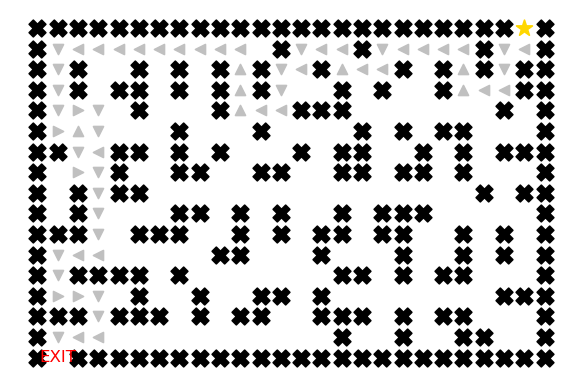

Starting point (x, y) = (0, 24)
Ending point (x, y) = (16, 1)


In [46]:
def dfs_search(matrix, start, end):    
    row = len(matrix)
    col = len(matrix[0])

    x = start[0]
    y = start[1]

    Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
    path = []
    stack = []
    stack.append((x,y))
    dfs = {}
    while end not in stack:

        s = stack[-1]
        if s not in path:
            path.append(s)
        #print(f'Curr: {s}')
        for i in range(4) :
            # using the direction array
            a = s[0] + Dir[i][0]
            b = s[1] + Dir[i][1]

            # not blocked and valid
            if(a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) not in path):
                stack.append((a, b))
                dfs[(a,b)] = s
                break
            if(i == 3 ):
                for j in range(4):
                    a1 = s[0] + Dir[j][0] 
                    b1 = s[1] + Dir[j][1]
                    if (a1,b1) in stack:
                        stack.pop()
                        break
    path.append(end)
    p = {}
    cell = end
    while cell != start:
        p[dfs[cell]] = cell 
        cell = dfs[cell]
    final = list(p.values())
    final.append(start)
    finalPath = final[::-1]
    
    return finalPath
visualize_maze(matrix,bonus_points,start,end, dfs_search(matrix, start, end))

40


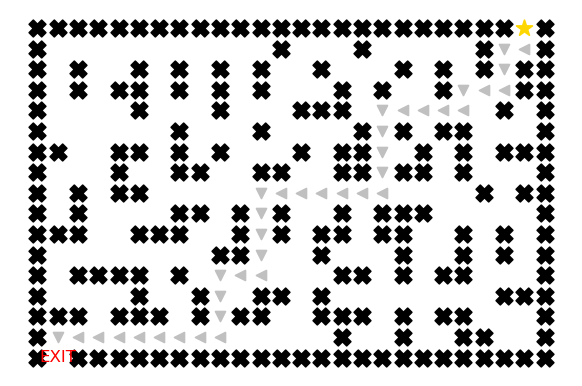

Starting point (x, y) = (0, 24)
Ending point (x, y) = (16, 1)


In [43]:
from collections import deque
def bfs_search(matrix, start, end):
    row = len(matrix)
    col = len(matrix[0])

    visited = [[False for i in range(col)]for j in range(row)]
    
    x = start[0]
    y = start[1]

    Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
    # Mark the source cell as visited
    visited[x][y] = True
    # Tao dictionary luu vi tri diem cha va diem con
    bfs = {}
    # Create a queue for BFS
    q = deque()

    q.append(start) #  Enqueue source cell

    # Do a BFS starting from source cell
    while q:
        curr = q.popleft() # Dequeue the front cell
        #path.append(curr)
        # If we have reached the destination cell,
        # we are done
        if curr[0] == end[0] and curr[1] == end[1]:
            break

        # Otherwise enqueue its adjacent cells
        for i in range(4):
            a = curr[0] + Dir[i][0]
            b = curr[1] + Dir[i][1]    
        # if adjacent cell is valid, has path 
        # and not visited yet, enqueue it.
            if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
                visited[a][b] = True
                q.append((a, b))
                bfs[(a,b)] = curr
    p = {}
    cell = end
    while cell != start:
        p[bfs[cell]] = cell 
        cell = bfs[cell]
    final = list(p.values())
    final.append(start)
    finalPath = final[::-1]
    print(len(finalPath))
    return finalPath
visualize_maze(matrix,bonus_points,start,end, bfs_search(matrix, start, end))

In [5]:
def Manhattan(cell1, cell2):
    x1, y1 = cell1
    x2, y2 = cell2
    return (abs(x1 - x2) + abs(y1 - y2))
def Euclid(cell1, cell2):
    x1, y1 = cell1
    x2, y2 = cell2
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)
def Octile(cell1,cell2):
    dx = abs(cell1[0] - cell2[0])
    dy = abs(cell1[1] - cell2[1])
    return (dx + dy) + (math.sqrt(2)) * min(dx, dy)

Length of search: 69
Length of path: 50


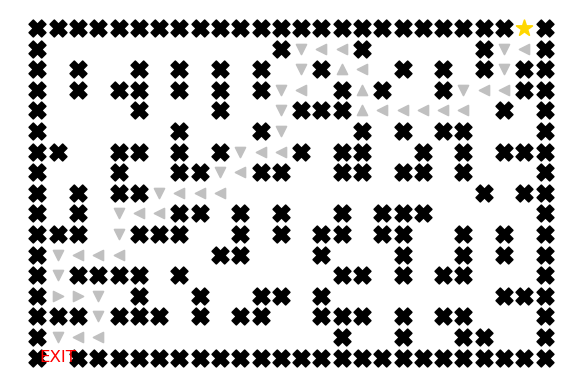

Starting point (x, y) = (0, 24)
Ending point (x, y) = (16, 1)


In [44]:
import time
def GBFS_search(matrix, start, end,heuristic): 
    begin = time.time()
    row = len(matrix)
    col = len(matrix[0])

    visited = [[False for i in range(col)]for j in range(row)]

    x = start[0]
    y = start[1]

    Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
    path = []
    # Mark the source cell as visited
    visited[x][y] = True
    greedy = {}
    # Create a queue for BFS
    q = deque()

    q.append(start) #  Enqueue source cell

    # Do a BFS starting from source cell
    while q:
        store_dist = {}
        curr = q.popleft() # Dequeue the front cell
        path.append(curr)
        # If we have reached the destination cell,
        # we are done
        if curr[0] == end[0] and curr[1] == end[1]:
            break
        # Otherwise enqueue its adjacent cells
        for i in range(4):
            a = curr[0] + Dir[i][0]
            b = curr[1] + Dir[i][1]    

        # if adjacent cell is valid, has path 
        # and not visited yet, enqueue it.
            if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
                #calculate distance from point current to end
                #dist = Manhattan((a,b),end)
                #dist = Euclid((a,b),end)
                #dist = DiagonalDistance((a,b),end)
                dist = heuristic((a,b),end)
                store_dist[(a, b)] = dist
                greedy[(a,b)] = curr
            #select point based on distance array
            if i == 3:
                if store_dist == {}:
                    #if it doesn't quit traverse path to find a new way :v
                    for point in reversed(path):
                        for i in range(4):
                            a = point[0] + Dir[i][0]
                            b = point[1] + Dir[i][1]
                            if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
                                #dist = Manhattan((a,b),end)
                                #dist = Euclid((a,b),end)
                                #dist = DiagonalDistance((a,b),end)
                                dist = heuristic((a,b),end)
                                store_dist[(a, b)] = dist  
                                break
                #print(store_dist)
                store_dist = dict(sorted(store_dist.items(), key=lambda item: item[1]))
                for key, val in store_dist.items():
                    visited[key[0]][key[1]] = True
                    q.append(key)
                    break
    p = {}
    cell = end
    while cell != start:
        p[greedy[cell]] = cell 
        cell = greedy[cell]
    final = list(p.values())
    final.append(start)
    finalPath = final[::-1]
    close = time.time()
    
    print(f'Length of search: {len(greedy.keys())}')
    print(f'Length of path: {len(finalPath)}')
    return [len(greedy.keys()),finalPath,(close-begin)*1000]

visualize_maze(matrix,bonus_points,start,end, GBFS_search(matrix, start, end,Euclid)[1])


Length of search: 101
Length of path: 42
0.001997709274291992


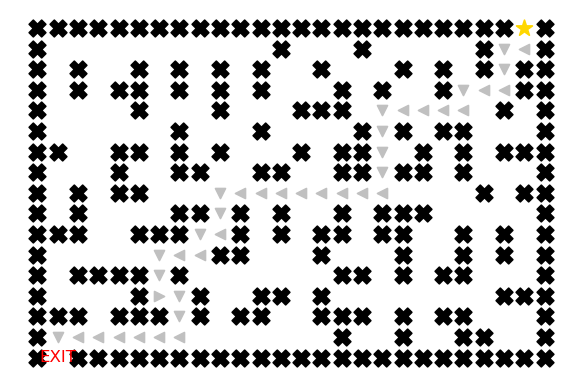

Starting point (x, y) = (0, 24)
Ending point (x, y) = (16, 1)


In [45]:
import time
def Astar_search(matrix, start, end,heuristic): 
    
    begin = time.time()
    row = len(matrix)
    col = len(matrix[0])
    
    real_distance = 0
    visited = [[False for i in range(col)]for j in range(row)]

    x = start[0]
    y = start[1]

    Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
    path = []
    aStar = {}
    # Mark the source cell as visited
    visited[x][y] = True

    # Create a queue for BFS
    q = deque()
    
    q.append(start) #  Enqueue source cell
    store_dist = {}
    # Do a BFS starting from source cell
    while q:
        
        curr = q.popleft() # Dequeue the front cell
        path.append(curr)
        # If we have reached the destination cell,
        # we are done
        if curr[0] == end[0] and curr[1] == end[1]:
            break
        #print(curr)
        #print(len(path))
        #print(len(aStar.values()))
        #print()
        # Otherwise enqueue its adjacent cells
        for i in range(4):
            a = curr[0] + Dir[i][0]
            b = curr[1] + Dir[i][1]    

        # if adjacent cell is valid, has path 
        # and not visited yet, enqueue it.
            if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
                #calculate distance from point current to end
                dist = heuristic((a,b),end) + heuristic(start,(a,b))
                store_dist[(a, b)] = dist
                aStar[(a,b)] = curr
            #select point based on distance array
            if i == 3:
                if store_dist == {}:
                    #if it doesn't quit traverse path to find a new way :v
                    for point in reversed(path):
                        for i in range(4):
                            a = point[0] + Dir[i][0]
                            b = point[1] + Dir[i][1]
                            if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
                                dist = heuristic((a,b),end) + heuristic(start,(a,b))
                                store_dist[(a, b)] = dist
                                break
                store_dist = dict(sorted(store_dist.items(), key=lambda item: item[1]))
                #print(store_dist)
                for key, val in store_dist.items():
                    visited[key[0]][key[1]] = True
                    q.append(key)
                    store_dist.pop(key)
                    break
        #print()
    p = {}
    cell = end
    while cell != start:
        p[aStar[cell]] = cell 
        cell = aStar[cell]
    final = list(p.values())
    final.append(start)
    finalPath = final[::-1]
    close = time.time()
    print(f'Length of search: {len(aStar.keys())}')
    print(f'Length of path: {len(finalPath)}')
    print(close-begin)
    return finalPath
visualize_maze(matrix,bonus_points,start,end, Astar_search(matrix, start, end,Euclid))

In [ ]:
#map 1
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
#     outfile.write('3 6 -3\n')
#     outfile.write('5 14 -1\n')
#     outfile.write('6 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x   x   xx xx        xx  xxx     xx\n')
    outfile.write('x     x     xxxxxx    xxx        xx\n')
    outfile.write('x x   +xx  xxxx xxx x           xxx\n')
    outfile.write('  x   x x xx   xxxx  xx x     xxxxx\n')
    outfile.write('x          xx +xx  x x xxxxxxxxxxxx\n')
    outfile.write('xxxxxxx x      xx  x xxxxx      xxx\n')
    outfile.write('xxxxxxxxx  x x  xx   xxx          x\n')
    outfile.write('x          x x  x x  xxxxxxxxxxxxxx\n')
    outfile.write('xxxxx x  x x x     x xxxxxxxxxxxxxx\n')
    outfile.write('xxxxxxxxxxxxxxxx               xxxx\n')
    outfile.write('xx     xxxx            xxxxx     xx\n')
    outfile.write('xxxx      xxxxxxxxxxxxxxxxx      xx\n')
    outfile.write('xS                     xxx     xxxx\n')
    outfile.write('xxxxxxx            xx      xxxxxxxx\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
matrix_1 = get_infor_from_matrix('maze_map.txt')
bonus_points = matrix_1[0]
matrix = matrix_1[1]
start = matrix_1[2]
end = matrix_1[3]
visualize_maze(matrix_1[1],matrix_1[0],matrix_1[2],matrix_1[3])

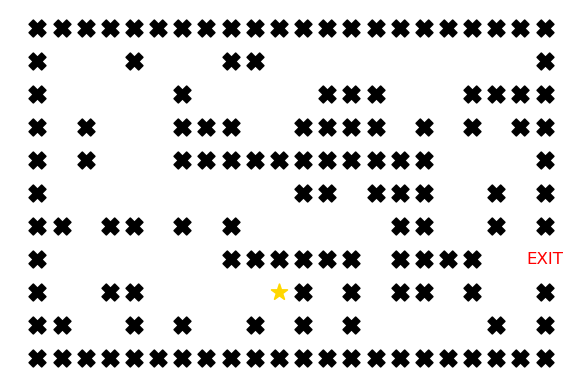

Starting point (x, y) = (8, 10)
Ending point (x, y) = (7, 21)


In [22]:
#map 2
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
#     outfile.write('3 6 -3\n')
#     outfile.write('5 14 -1\n')
#     outfile.write('6 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x   x   xx           x\n')
    outfile.write('x     x     xxx   xxxx\n')
    outfile.write('x x   xxx  xxxx x x xx\n')
    outfile.write('x x   xxxxxxxxxxx    x\n')
    outfile.write('x          xx xxx  x x\n')
    outfile.write('xx xx x x      xx  x x\n')
    outfile.write('x       xxxxxx xxxx   \n')
    outfile.write('x  xx     Sx x xx x  x\n')
    outfile.write('xx  x x  x x x     x x\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx')
matrix_2 = get_infor_from_matrix('maze_map.txt')
bonus_points = matrix_2[0]
matrix = matrix_2[1]
start = matrix_2[2]
end = matrix_2[3]
visualize_maze(matrix_2[1],matrix_2[0],matrix_2[2],matrix_2[3])

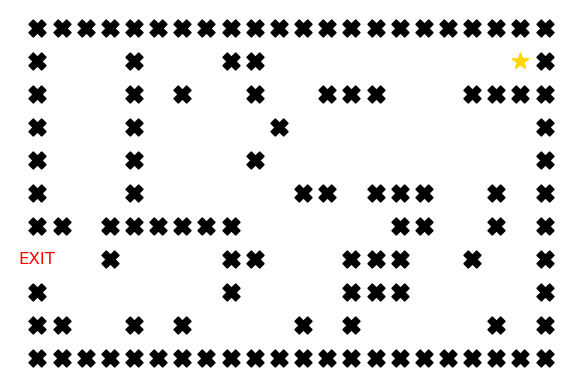

Starting point (x, y) = (1, 20)
Ending point (x, y) = (7, 0)


In [16]:
#map 3
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
#     outfile.write('3 6 -3\n')
#     outfile.write('5 14 -1\n')
#     outfile.write('6 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x   x   xx          Sx\n')
    outfile.write('x   x x  x  xxx   xxxx\n')
    outfile.write('x   x     x          x\n')
    outfile.write('x   x    x           x\n')
    outfile.write('x   x      xx xxx  x x\n')
    outfile.write('xx xxxxxx      xx  x x\n')
    outfile.write('   x    xx   xxx  x  x\n')
    outfile.write('x       x    xxx     x\n')
    outfile.write('xx  x x    x x     x x\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx')
matrix_3 = get_infor_from_matrix('maze_map.txt')
bonus_points = matrix_3[0]
matrix = matrix_3[1]
start = matrix_3[2]
end = matrix_3[3]
visualize_maze(matrix_3[1],matrix_3[0],matrix_3[2],matrix_3[3])

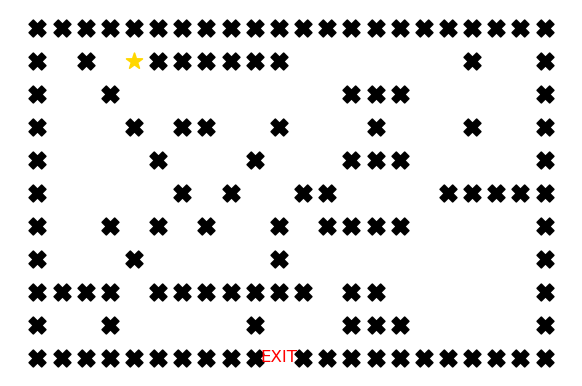

Starting point (x, y) = (1, 4)
Ending point (x, y) = (10, 10)


In [13]:
#map 4
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
#     outfile.write('3 6 -3\n')
#     outfile.write('5 14 -1\n')
#     outfile.write('6 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x x Sxxxxxx       x  x\n')
    outfile.write('x  x         xxx     x\n')
    outfile.write('x   x xx  x   x   x  x\n')
    outfile.write('x    x   x   xxx     x\n')
    outfile.write('x     x x  xx    xxxxx\n')
    outfile.write('x  x x x  x xxxx     x\n')
    outfile.write('x   x     x          x\n')
    outfile.write('xxxx xxxxxxx xx      x\n')
    outfile.write('x  x     x   xxx     x\n')
    outfile.write('xxxxxxxxxx xxxxxxxxxxx')
matrix_4 = get_infor_from_matrix('maze_map.txt')
bonus_points = matrix_4[0]
matrix = matrix_4[1]
start = matrix_4[2]
end = matrix_4[3]
visualize_maze(matrix_4[1],matrix_4[0],matrix_4[2],matrix_4[3])

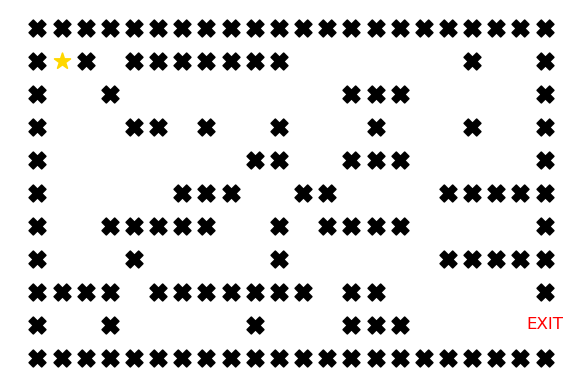

Starting point (x, y) = (1, 1)
Ending point (x, y) = (9, 21)


In [19]:
#map 5
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
#     outfile.write('3 6 -3\n')
#     outfile.write('5 14 -1\n')
#     outfile.write('6 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('xSx xxxxxxx       x  x\n')
    outfile.write('x  x         xxx     x\n')
    outfile.write('x   xx x  x   x   x  x\n')
    outfile.write('x        xx  xxx     x\n')
    outfile.write('x     xxx  xx    xxxxx\n')
    outfile.write('x  xxxxx  x xxxx     x\n')
    outfile.write('x   x     x      xxxxx\n')
    outfile.write('xxxx xxxxxxx xx      x\n')
    outfile.write('x  x     x   xxx      \n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx')
matrix_5 = get_infor_from_matrix('maze_map.txt')
bonus_points = matrix_5[0]
matrix = matrix_5[1]
start = matrix_5[2]
end = matrix_5[3]
visualize_maze(matrix_5[1],matrix_5[0],matrix_5[2],matrix_5[3])

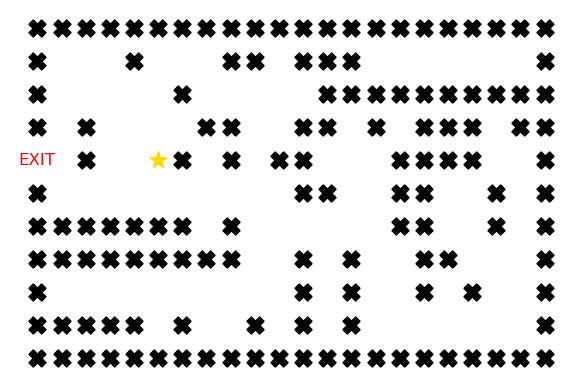

Starting point (x, y) = (4, 5)
Ending point (x, y) = (4, 0)


In [7]:
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
#     outfile.write('3 6 -3\n')
#     outfile.write('5 14 -1\n')
#     outfile.write('6 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x   x   xx xxx       x\n')
    outfile.write('x     x     xxxxxxxxxx\n')
    outfile.write('x x    xx  xx x xxx xx\n')
    outfile.write('  x  Sx x xx   xxxx  x\n')
    outfile.write('x          xx  xx  x x\n')
    outfile.write('xxxxxxx x      xx  x x\n')
    outfile.write('xxxxxxxxx  x x  xx   x\n')
    outfile.write('x          x x  x x  x\n')
    outfile.write('xxxxx x  x x x       x\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx')
matrix_1 = get_infor_from_matrix('maze_map.txt')
bonus_points = matrix_1[0]
matrix = matrix_1[1]
start = matrix_1[2]
end = matrix_1[3]
visualize_maze(matrix_1[1],matrix_1[0],matrix_1[2],matrix_1[3])

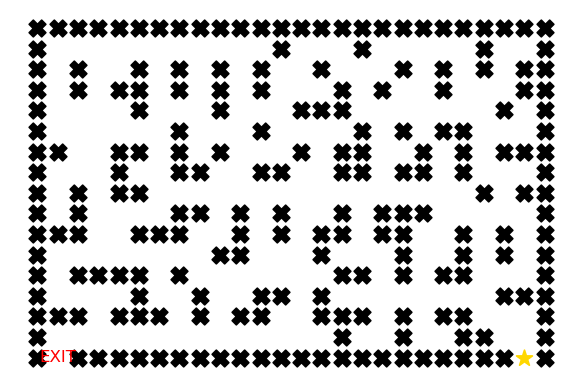

Starting point (x, y) = (16, 24)
Ending point (x, y) = (16, 1)


In [38]:
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x           x   x     x  x\n')
    outfile.write('x x  x x x x  x   x x x xx\n')
    outfile.write('x x xx x x x   x x  x   xx\n')
    outfile.write('x    x   x   xxx       x x\n')
    outfile.write('x      x   x    x x xx   x\n')
    outfile.write('xx  xx x x   x xx  x x xxx\n')
    outfile.write('x   x  xx  xx  xx xx x   x\n')
    outfile.write('x x xx                x xx\n')
    outfile.write('x x    xx x x  x xxx     x\n')
    outfile.write('xxx  xxx  x x xx xx  x x x\n')
    outfile.write('x        xx   x   x  x x x\n')
    outfile.write('x xxxx x       xx x xx   x\n')
    outfile.write('x    x  x  xx x        xxx\n')
    outfile.write('xxx xxx x xx  xxx x xx   x\n')
    outfile.write('x              x  x  xx  x\n')
    outfile.write('x xxxxxxxxxxxxxxxxxxxxxxSx\n')
matrix_6 = get_infor_from_matrix('maze_map.txt')
bonus_points = matrix_6[0]
matrix = matrix_6[1]
start = matrix_6[2]
end = matrix_6[3]
visualize_maze(matrix_6[1],matrix_6[0],matrix_6[2],matrix_6[3])

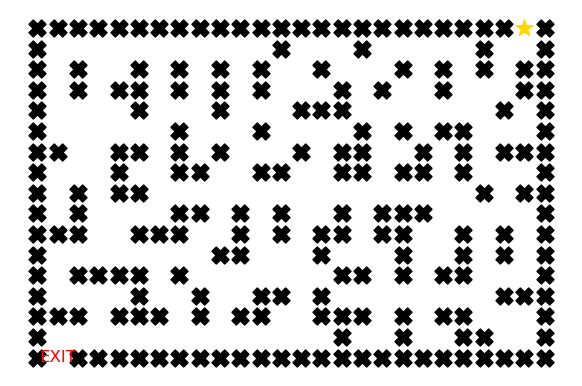

Starting point (x, y) = (0, 24)
Ending point (x, y) = (16, 1)


In [42]:
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxxxxSx\n')
    outfile.write('x           x   x     x  x\n')
    outfile.write('x x  x x x x  x   x x x xx\n')
    outfile.write('x x xx x x x   x x  x   xx\n')
    outfile.write('x    x   x   xxx       x x\n')
    outfile.write('x      x   x    x x xx   x\n')
    outfile.write('xx  xx x x   x xx  x x xxx\n')
    outfile.write('x   x  xx  xx  xx xx x   x\n')
    outfile.write('x x xx                x xx\n')
    outfile.write('x x    xx x x  x xxx     x\n')
    outfile.write('xxx  xxx  x x xx xx  x x x\n')
    outfile.write('x        xx   x   x  x x x\n')
    outfile.write('x xxxx x       xx x xx   x\n')
    outfile.write('x    x  x  xx x        xxx\n')
    outfile.write('xxx xxx x xx  xxx x xx   x\n')
    outfile.write('x              x  x  xx  x\n')
    outfile.write('x xxxxxxxxxxxxxxxxxxxxxxxx\n')
matrix_6 = get_infor_from_matrix('maze_map.txt')
bonus_points = matrix_6[0]
matrix = matrix_6[1]
start = matrix_6[2]
end = matrix_6[3]
visualize_maze(matrix_6[1],matrix_6[0],matrix_6[2],matrix_6[3])

In [ ]:
import time
def Astar_search(matrix, start, end,heuristic): 
    
    begin = time.time()
    row = len(matrix)
    col = len(matrix[0])
    
    real_distance = 0
    visited = [[False for i in range(col)]for j in range(row)]

    x = start[0]
    y = start[1]

    Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
    path = []
    aStar = {}
    # Mark the source cell as visited
    visited[x][y] = True

    # Create a queue for BFS
    q = deque()
    
    q.append(start) #  Enqueue source cell
    store_dist = {}
    # Do a BFS starting from source cell
    while q:
        #store_dist = {}
        curr = q.popleft() # Dequeue the front cell
        path.append(curr)
        # If we have reached the destination cell,
        # we are done
        if curr[0] == end[0] and curr[1] == end[1]:
            break
        print(curr)
        #print(len(path))
        #print(len(aStar.values()))
        #print()
        # Otherwise enqueue its adjacent cells
        for i in range(4):
            a = curr[0] + Dir[i][0]
            b = curr[1] + Dir[i][1]    

        # if adjacent cell is valid, has path 
        # and not visited yet, enqueue it.
            if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
                #calculate distance from point current to end
                dist = heuristic((a,b),end) + heuristic(start,(a,b))
                store_dist[(a, b)] = dist
                aStar[(a,b)] = curr
            #select point based on distance array
            if i == 3:
                if store_dist == {}:
                    #if it doesn't quit traverse path to find a new way :v
                    for point in reversed(path):
                        for i in range(4):
                            a = point[0] + Dir[i][0]
                            b = point[1] + Dir[i][1]
                            if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
                                dist = heuristic((a,b),end) + heuristic(start,(a,b))
                                store_dist[(a, b)] = dist
                                break
                store_dist = dict(sorted(store_dist.items(), key=lambda item: item[1]))
                print(store_dist)
                for key, val in store_dist.items():
                    visited[key[0]][key[1]] = True
                    q.append(key)
                    store_dist.pop(key)
                    break
        print()
    p = {}
    cell = end
    while cell != start:
        p[aStar[cell]] = cell 
        cell = aStar[cell]
    final = list(p.values())
    final.append(start)
    finalPath = final[::-1]
    close = time.time()
    print(f'Length of search: {len(aStar.keys())}')
    print(f'Length of path: {len(finalPath)}')
    print(close-begin)
    return finalPath
visualize_maze(matrix,bonus_points,start,end, Astar_search(matrix, start, end,Euclid))